In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

Load revenue data

In [23]:
df = pd.read_csv("revenue_timeseries.csv", parse_dates=['date'], index_col='date')
df = df.asfreq('MS')
df['revenue'] = df['revenue'].interpolate()

Plot original revenue

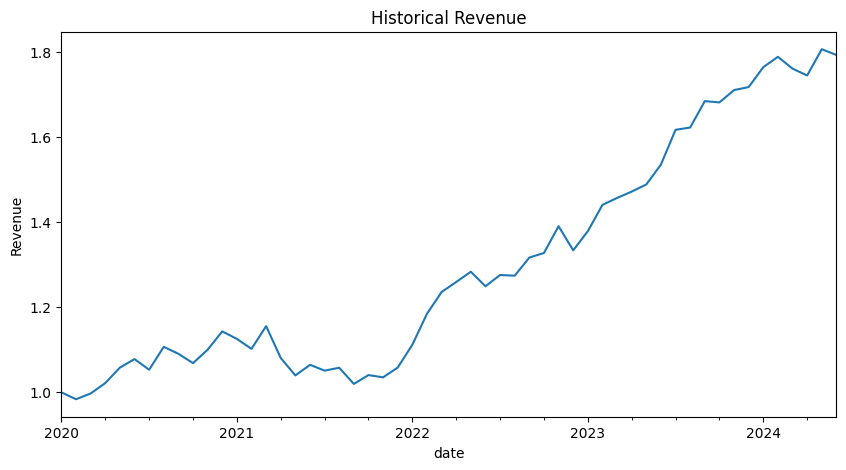

In [24]:
df['revenue'].plot(figsize=(10,5), title='Historical Revenue')
plt.ylabel("Revenue")
plt.show()

Fit ARIMA model

In [25]:
model = ARIMA(df['revenue'], order=(2, 1, 2))
model_fit = model.fit()
forecast = model_fit.forecast(steps=12)

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Plot forecast

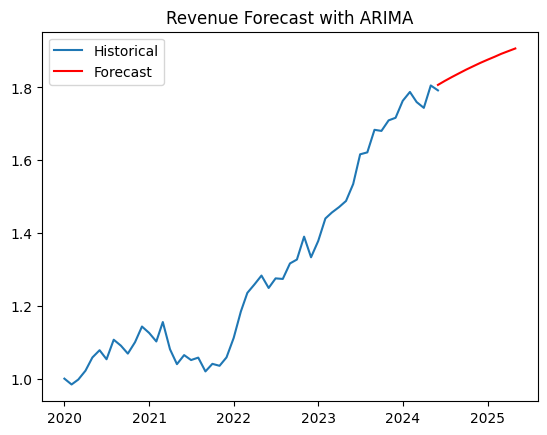

In [26]:
plt.plot(df.index, df['revenue'], label='Historical')
plt.plot(pd.date_range(df.index[-1], periods=12, freq='MS'), forecast, label='Forecast', color='red')
plt.legend()
plt.title("Revenue Forecast with ARIMA")
plt.show()


Monte Carlo Simulation for Future Revenue

Estimate drift and volatility

In [27]:
log_returns = np.log(df['revenue'] / df['revenue'].shift(1)).dropna()
mu, sigma = log_returns.mean(), log_returns.std()

Simulate 1000 paths over 12 months

In [28]:
simulations = []
for _ in range(1000):
    prices = [df['revenue'].iloc[-1]]
    for _ in range(12):
        prices.append(prices[-1] * np.exp(np.random.normal(mu, sigma)))
    simulations.append(prices[1:])

simulations = np.array(simulations)
expected_path = simulations.mean(axis=0)

Plot simulation envelope

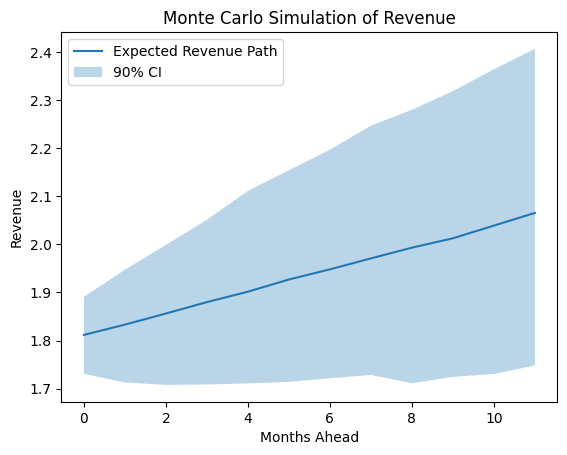

In [29]:
plt.plot(expected_path, label='Expected Revenue Path')
plt.fill_between(range(12), np.percentile(simulations, 5, axis=0), np.percentile(simulations, 95, axis=0), alpha=0.3, label='90% CI')
plt.title("Monte Carlo Simulation of Revenue")
plt.xlabel("Months Ahead")
plt.ylabel("Revenue")
plt.legend()
plt.show()
